# Clean up exercise 11/09 2024 by Ahmad Alkaseb

Status of each exercise:
* 21: DONE
* 22: DONE
* 23: DONE
* 24: DONE

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, shapiro

In [4]:
# load the data into pandas dataframe
df = pd.read_csv('weather.csv')

In [5]:
# Get info about the loaded data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [6]:
# Get number of levels in ordinal column
levels = len(pd.Series(df['Description']).value_counts())
print('There are {} levels in the Description column'.format(levels))

There are 3 levels in the Description column


In [7]:
# One-Hot Encoding - By using drop_first=True we only get to columns. It will remove the first one.
df_dummies = pd.get_dummies(df, drop_first=True)

In [8]:
# Get information about the columns in the df_dumies. [0] = rows -- [1] = columns. We create a tuble, which we will use to insert data by using .format
# method.
print('There are {} columns in df_dummies'.format(df_dummies.shape[1]))

There are 9 columns in df_dummies


In [9]:
# Shuffle the our dummies. By using random_state = [n], we will always get the same random value.
df_shuffled = shuffle(df_dummies, random_state=42)

In [10]:
# Split the our shuffled data into x and y.
DV = 'Temperature_c' # Save our temperature column as DV (Dependent variable)
X = df_shuffled.drop(DV, axis=1) # From our shuffled data we're going to remove our DV and axis = 1 (means our columns).
y = df_shuffled[DV] # This will only give us the 'Temperature_c' column.

In [11]:
# Building machine learning model
# Our machine needs data to train to predict y. Therefore our X is our training data. 
# test_size = 0.33 meaning we will use 33% data to test our model.

# X_train & y_train (our training data (67%))
# X_test & y_test (our test data(33%))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# Use LinearRegression()
model = LinearRegression()

In [13]:
# Let's now train our model for the specific column, 'Humidity'
model.fit(X_train[['Humidity']], y_train)

LinearRegression()

In [14]:
# Extract the models b value (intercept = skæringspunkt med y-aksen)
intercept = model.intercept_

In [15]:
# Extract the a coefficient
coefficient = model.coef_

In [16]:
# Print out the formula for the Temperature
print('Temperature = {0:0.2f} + ({1:0.2f} x Humidity)'.format(intercept, coefficient[0]))

Temperature = 34.50 + (-30.69 x Humidity)


In [17]:
# Generate predictions for the 'Humidity' column
predictions = model.predict(X_test[['Humidity']])

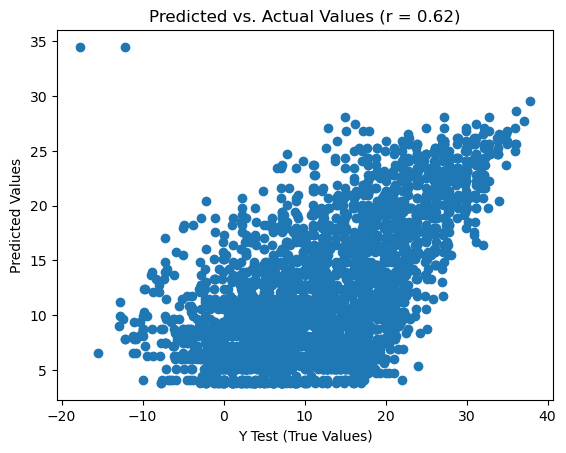

In [37]:
# plot correlation of predicted and actual values
# Plot the correlation of predicted and actual values in a scatterplot.
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()

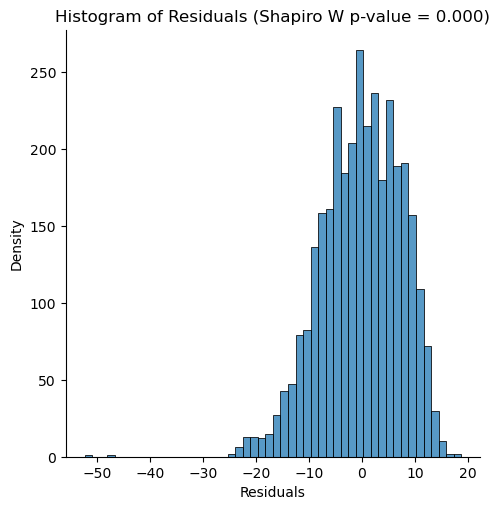

In [39]:
# plot distribution of residuals
sns.displot((y_test - predictions), bins = 50)
plt.xlabel('Residuals') # Difference between the real and predicted value. (Error)
plt.ylabel('Density') # How many are in each bin
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1])) # -->
# The value that tells us that if p-value is high (typically greater than 0.05), it suggests that the residuals are likely normally distributed)
plt.show()

In [1]:
# Create metrics dataframe from pandas

# MAE: Average absolute error between actual and predicted values. Model's predictions are off by about 6.052
# MSE: Average squared error between actual and predicted values. Deviation of the predictions from the actual values is: 56.187
# RMSE: Square root of MSE, providing error magnitude in the same unit as the target. The model's predictions deviate from the actual values by: 7.496
# R-Squared: Proportion of variance explained by the model. R-squared value of 0.389 is : 38.9%
# .round(3) gives us three decimals

metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)

NameError: name 'pd' is not defined

In [43]:
# Print out the metrics dataframe
metrics_df

,Metric,Value
0,MAE,6.052
1,MSE,56.187
2,RMSE,7.496
3,R-Squared,0.389


In [45]:
# Fit model to training data with all the columns
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Extract the interception and a-coefficients
intercept = model.intercept_
coefficients = model.coef_

In [49]:
# Print out the formula with all the columns not just humidity
print('Temperature = {0:0.2f} + ({1:0.2f} x Humidity) + ({2:0.2f} x Wind Speed) + ({3:0.2f} x Wind Bearing Degrees) + ({4:0.2f} x Visibility) + ({5:0.2f} x Pressure) + ({6:0.2f} x Rain) + ({7:0.2f} x Normal Weather) + ({8:0.2f} x Warm Weather)'.format(intercept, 
                                                                                                                                                                                                                                                            coefficients[0],
                                                                                                                                                                                                                                                            coefficients[1],
                                                                                                                                                                                                                                                            coefficients[2],
                                                                                                                                                                                                                                                            coefficients[3],
                                                                                                                                                                                                                                                            coefficients[4],
                                                                                                                                                                                                                                                            coefficients[5],
                                                                                                                                                                                                                                                            coefficients[6],
                                                                                                                                                                                                                                                            coefficients[7]))

Temperature = 3.54 + (-7.93 x Humidity) + (-0.07 x Wind Speed) + (0.00 x Wind Bearing Degrees) + (0.06 x Visibility) + (0.00 x Pressure) + (5.61 x Rain) + (8.54 x Normal Weather) + (19.10 x Warm Weather)
